In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\K-Means & Hirarchical Clustering\Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
print(df.columns)
print(df.dtypes)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [14]:
# --------------------------- Data Preprocessing ----------------------------

# Step 3: Label Encoding for categorical columns
# Label Encoding converts categorical variables like 'state_name' and 'location' into numeric values
label_encoder = LabelEncoder()

# Encode 'state_name' and 'location' columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [15]:
df = df.drop(['User ID'], axis=1)

In [16]:
# Step 2: Selecting Features for Clustering
# Since the task specifies to base clustering on the 'EstimatedSalary' column, we'll focus on it and optionally 'Age'
X = df[['EstimatedSalary', 'Age']]

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Step 3: Finding the Optimal Number of Clusters using the Elbow Method

inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


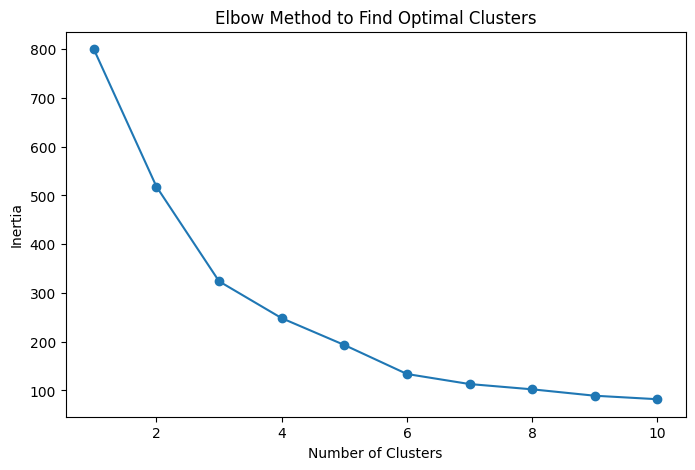

In [18]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

In [19]:
# Step 4: Apply K-Means Clustering with Optimal Number of Clusters
# Let's assume the elbow point suggests 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [20]:
print(df.head())

   Gender  Age  EstimatedSalary  Purchased  Cluster
0       1   19            19000          0        0
1       1   35            20000          0        0
2       0   26            43000          0        0
3       0   27            57000          0        0
4       1   19            76000          0        0


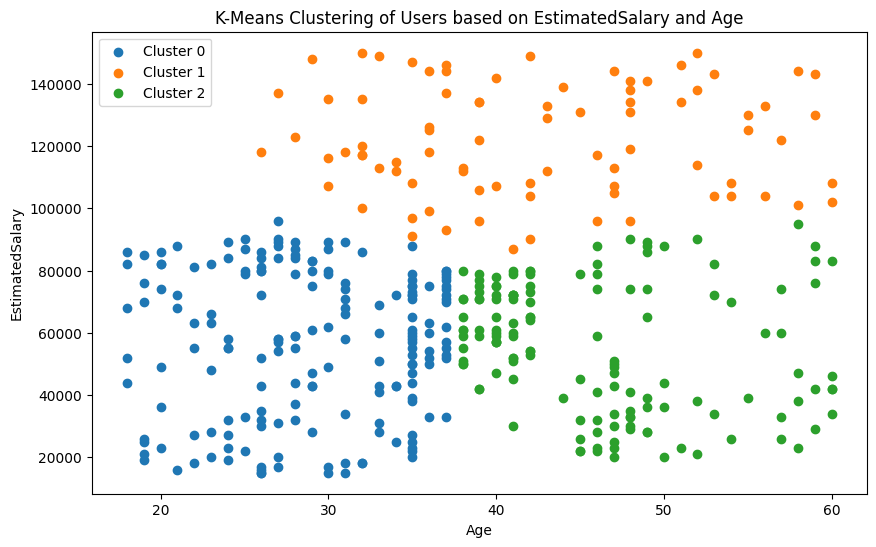

In [21]:
# Visualize the Clusters (2D plot for Age vs. EstimatedSalary)
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['EstimatedSalary'], label=f'Cluster {i}')
    
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('K-Means Clustering of Users based on EstimatedSalary and Age')
plt.legend()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Step 1: Data Pre-processing

# Drop columns that are not needed for clustering
df = df.drop(['User ID'], axis=1)

# Label encoding for categorical columns (if necessary)
# Encoding the 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Step 2: Selecting Features for Clustering
# Since the task specifies to base clustering on the 'EstimatedSalary' column, we'll focus on it and optionally 'Age'
X = df[['EstimatedSalary', 'Age']]

# Standardizing the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Finding the Optimal Number of Clusters using the Elbow Method

inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

# Step 4: Apply K-Means Clustering with Optimal Number of Clusters
# Let's assume the elbow point suggests 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze the Clusters
# Checking the first few rows with cluster labels
print(df.head())

# Visualize the Clusters (2D plot for Age vs. EstimatedSalary)
plt.figure(figsize=(10, 6))
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Age'], cluster_data['EstimatedSalary'], label=f'Cluster {i}')
    
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('K-Means Clustering of Users based on EstimatedSalary and Age')
plt.legend()
plt.show()
